<a href="https://colab.research.google.com/github/ZahibVentura/Interesante-y-practica/blob/main/Juegos_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Juego 1
Se arroja un dado, el tuyo, y el número que salga es tu ganancia en pesos. Luego, se arroja un segundo dado, el mío, y el número que salga será tu pérdida. Por ejemplo, si en tu dado sale 6 y en el mío 3, habrás ganado 3 pesos; sin embargo, si en tu dado cae 2 y en el mío 6, yo habré ganado 4 pesos. Observa que los valores posibles van de −5 a 5.

In [105]:
import random as rd #importamos las librerias a utilizar
import matplotlib.pyplot as plt
import numpy as np

In [106]:
#Creamos nuestro dado
def dado():
    dado = rd.randint(1,6)
    return dado

In [107]:
n = 10000 #definimos el número de iteraciones
esperado = 0
Lista = []

#Aplicamos un Monte Carlo basico
for i in range(n):
    dado1 = dado()
    dado2 = dado()
    esperado += dado1 - dado2
    if i == n-1:
      Lista.append(esperado/n)
    else:
      Lista.append((esperado)/(i+1))


In [108]:
print("Valor esperado: ", esperado/n)

Valor esperado:  -0.0053


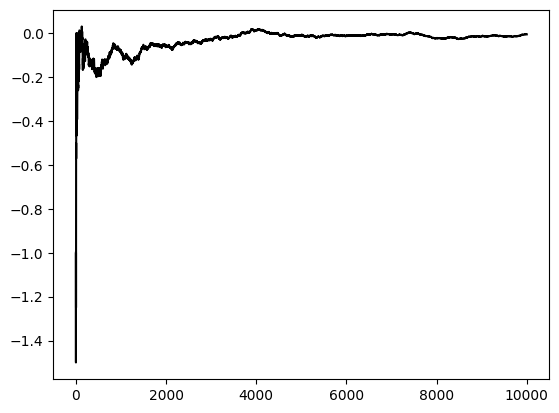

In [109]:
plt.plot(Lista, color = 'k')
plt.show()

In [110]:
"""media = np.mean(Lista)
desviacion = np.std(Lista)

plt.axhline(y=media, color='r', linestyle='--') #media
plt.axhline(y=media+desviacion, color='b', linestyle='-') #limite superior del intervalo
plt.axhline(y=media-desviacion, color='b', linestyle='-') #limite inferior del intervalo
plt.plot(Lista, color = 'k')
plt.show()"""

"media = np.mean(Lista)\ndesviacion = np.std(Lista)\n\nplt.axhline(y=media, color='r', linestyle='--') #media\nplt.axhline(y=media+desviacion, color='b', linestyle='-') #limite superior del intervalo\nplt.axhline(y=media-desviacion, color='b', linestyle='-') #limite inferior del intervalo \nplt.plot(Lista, color = 'k')\nplt.show()"

In [111]:
#MonteCarlo mejorado
E = 0
Lista1 = []
for i in range(1,n,1):
    dado1 = dado()
    dado2 = dado()
    if i == 1:
      E = dado1 - dado2
    else:
      E = E + ((dado1 - dado2)-E)/(i+1)
    Lista1.append(E)

In [112]:
print("Valor medio: ", Lista1[-1])

Valor medio:  0.024899999999999874


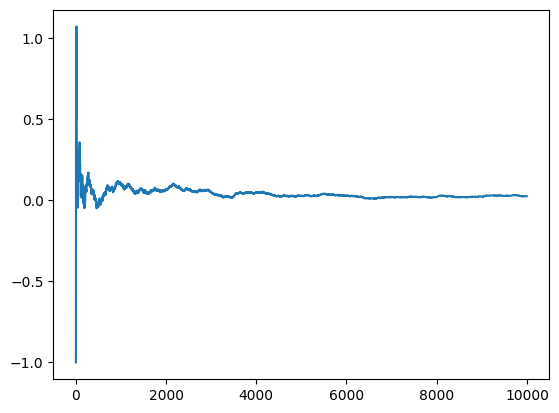

In [113]:
plt.plot(Lista1)
plt.show()

###Juego 2
 Se arrojan dos dados, tu ganancia será el resultado de restar el puntaje más chico del más grande, o cero en caso de que las caras de los dos dados sean iguales. Observa que los valores posibles van de 0 a 5, es decir, siempre es positivo. Entonces, para que el juego sea justo, yo te pido 2 pesos para arrojar los dados. Por ejemplo, si un dado cae 3 y otro 4, pierdes 1 peso (4-3 = 1, pero debes restar los dos pesos que apostaste para poder jugar); sin embargo, si un dado cae 6 y el otro 1, ganas 3 pesos (6-1-2=3).

In [114]:
precio_jugada = 2 #definimos el precio por jugar

Ganacia = []
Es = 0
#Aplicando MonteCarlo mejorado
for i in range(1,n,1):
  d1 = dado()
  d2 = dado()
  if i == 1:
    if d1 >= d2:
      Es = d1 - d2 - precio_jugada
    else:
      Es = d2 - d1 - precio_jugada    #definimos las condiciones de los resultado
  else:
    if d1 >= d2:
      Es = Es + ((d1 - d2 - precio_jugada)-Es)/(i+1)
    else:
      Es = Es + ((d2 - d1 - precio_jugada)-Es)/(i+1)
  Ganacia.append(Es)

In [115]:
print("Valor esperado: ", Ganacia[-1])

Valor esperado:  -0.04629999999999985


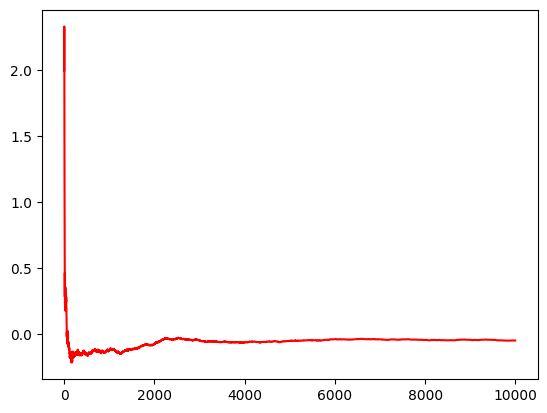

In [116]:
plt.plot(Ganacia, color = 'r')
plt.show()

Notemos que en los dos juego obtenemos un valor esperado de 0, con una pequeña diferencia en el juego 2, ya que este parece ser de -0.05, será una diferencia de apenas centavos, por lo que la persona podria ser indiferente ante este valor y jugar cualquiera de los dos, pero si para él o ella son importantes esos centavos entonces juegue el juego 1 o no jugar.